In [2]:
% matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from snntoolbox.datasets.aedat.DVSIterator import DVSIterator, load_event_list, get_frames_from_sequence, extract_batch, next_eventframe_batch

data_path = '/home/rbodo/.snntoolbox/Datasets/predator_prey/aedat/all'
data_path2 = '/home/rbodo/.snntoolbox/Datasets/predator_prey/npz/dvs/rectified_sum'
path = '/home/rbodo/.snntoolbox/data/predator_prey'

In [14]:
x_test = np.load(os.path.join(data_path, 'x_9.npz'))['arr_0']
y_test = np.load(os.path.join(data_path, 'y_9.npz'))['arr_0']

x_test2 = np.load(os.path.join(data_path2, 'x_test.npz'))['arr_0']
y_test2 = np.load(os.path.join(data_path2, 'y_test.npz'))['arr_0']

In [3]:
filename_x = 'DAVIS240C-2016-02-23T12-42-14+0000-04010058-0_recording_8.aedat'
filename_y = 'DAVIS240C-2016-02-23T12-42-14+0000-04010058-0_recording_8-targets.txt'

In [3]:
def get_y(filepath, start_times):
    
    label_file = open(filepath)
    labels_list = []
    times_list = []
    lines = label_file.readlines()
    
    for line in lines:
        line_segments = line.split()
        if line_segments[0] == '#':
            continue
        t = int(line_segments[1])
        x_coord = int(line_segments[2])

        if x_coord == -1:
            label = 0  # N
        elif x_coord < 80:
            label = 1  # L
        elif x_coord < 160:
            label = 2  # C
        elif x_coord < 240:
            label = 3  # R
        else:
            label = 4  # Invalid
        labels_list.append(label)
        times_list.append(t)
    
    labels_array = np.array(labels_list)
    times_array = np.array(times_list)
    y = []
    for st in start_times:
        diff = np.abs(times_array - st)
        y.append(labels_array[np.argmin(diff)])

    return np.array(y)

In [3]:
data_format = 'channels_last'
num_dvs_events_per_sample = 5000
chip_size = [240, 180]
image_shape = [36, 36]
label_dict = {"N": "0", "L": "1", "C": "2", "R": "3",}
frame_gen_method = 'rectified_sum'
is_x_first = True
is_x_flipped = True
is_y_flipped = True

In [5]:
filepath_x = os.path.join(data_path, filename_x)
filepath_y = os.path.join(data_path, filename_y)
 
event_sequence = load_event_list(filepath_x)

Loading DVS sample /home/rbodo/.snntoolbox/Datasets/predator_prey/aedat/all/DAVIS240C-2016-02-23T12-42-14+0000-04010058-0_recording_8.aedat...


In [6]:
num_frames = int(len(event_sequence) / num_dvs_events_per_sample)

timestamps = [e[2] for e in event_sequence]

start_times = timestamps[::num_dvs_events_per_sample]

y_ = get_y(filepath_y, start_times)
y_test3 = to_categorical(y_, 4)

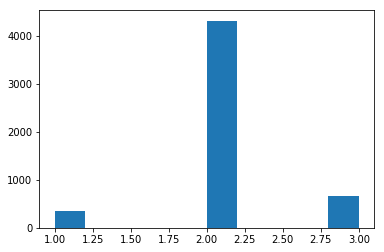

In [7]:
plt.hist(np.argmax(y_test3, -1));

In [5]:
maxpool_subsampling = True
do_clip_three_sigma = True
x_test3 = get_frames_from_sequence(
    event_sequence, num_dvs_events_per_sample, data_format, frame_gen_method, 
    is_x_first, is_x_flipped, is_y_flipped, maxpool_subsampling, 
    do_clip_three_sigma, chip_size, image_shape)

None
Extracting 248 frames from DVS event sequence.


In [6]:
maxpool_subsampling = False
do_clip_three_sigma = True
x_test4 = get_frames_from_sequence(
    event_sequence, num_dvs_events_per_sample, data_format, frame_gen_method, 
    is_x_first, is_x_flipped, is_y_flipped, maxpool_subsampling, 
    do_clip_three_sigma, chip_size, image_shape)

Extracting 248 frames from DVS event sequence.


In [6]:
maxpool_subsampling = True
do_clip_three_sigma = True
batch_size = 1  # len(x_test3)
event_deques_list = extract_batch(
    event_sequence, frame_gen_method, batch_size, 0, num_dvs_events_per_sample, 
    maxpool_subsampling, do_clip_three_sigma, chip_size, image_shape)

Extracting batch of samples à 5000 events from DVS sequence...
Discarded 274 events during subsampling.
Discarded 291 events during 3-sigma standardization.


In [7]:
maxpool_subsampling = False
do_clip_three_sigma = True
batch_size = 1  # len(x_test3)
event_deques_list2 = extract_batch(
    event_sequence, frame_gen_method, batch_size, 0, num_dvs_events_per_sample, 
    maxpool_subsampling, do_clip_three_sigma, chip_size, image_shape)

Extracting batch of samples à 5000 events from DVS sequence...
Discarded 296 events during 3-sigma standardization.


In [6]:
print(x_test3[-1012, :, :, 0])

IndexError: index -1012 is out of bounds for axis 0 with size 248

Text(0.5,1,'2')

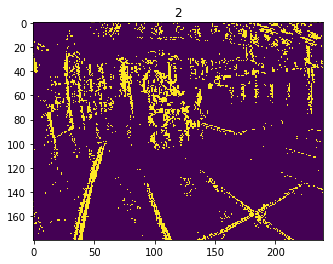

In [12]:
j = 343
plt.imshow(x_test3[j, :, :, 0].transpose())
plt.title(np.argmax(y_test3[j]))

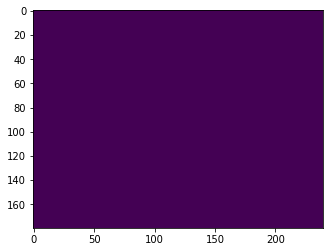

In [18]:
plt.imshow(x_test3[2, :, :, 0].transpose())

In [16]:
x_test3_sum = np.sum(x_test3, (1, 2, 3))
x_test4_sum = np.sum(x_test4, (1, 2, 3))

In [17]:
x_test3_sum

array([ 523.57141113,  592.28570557,    0.        ,  585.00006104,
        640.        ,  612.85717773,  622.        ,    0.        ,
        623.28570557,  599.1428833 ,  611.00012207,    0.        ,
        599.        ,  606.28570557,    0.        ,  600.28570557,
        622.2857666 ,    0.        ,  563.2857666 ,  606.57141113,
        652.28570557,  620.71435547,  553.1428833 ,    0.        ,
        539.1428833 ,    0.        ,  556.71429443,  612.57147217,
        602.14282227,    0.        ,  564.8571167 ,    0.        ,
        583.        ,    0.        ,  582.        ,  594.        ,
          0.        ,  583.57147217,  576.85717773,    0.        ,
        571.42858887,  639.42852783,  573.        ,    0.        ,
        667.85717773,  665.85723877,  651.71429443,  550.57147217,
        662.2857666 ,  610.1428833 ,  539.57147217,  659.42858887,
        665.1428833 ,  654.28570557,  664.28570557,  566.28570557,
        565.57147217,  575.1428833 ,  584.71429443,  556.71429

(array([ 39535.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   3665.]),
 array([ 0.        ,  0.01428571,  0.02857143,  0.04285714,  0.05714286,
         0.07142857,  0.08571429,  0.1       ,  0.11428572,  0.12857143,
         0.14285715]),
 <a list of 10 Patch objects>)

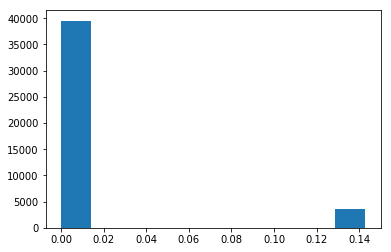

In [16]:
plt.hist(x_test3[0, :, :, 0].flatten())

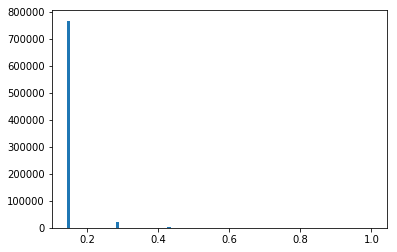

In [39]:
plt.hist(x_test3[x_test3.nonzero()], 100);

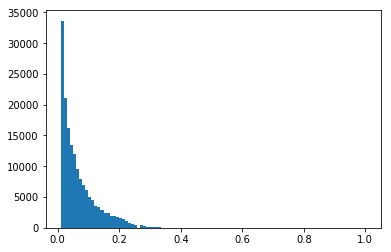

In [38]:
plt.hist(x_test4[x_test4.nonzero()], 100);

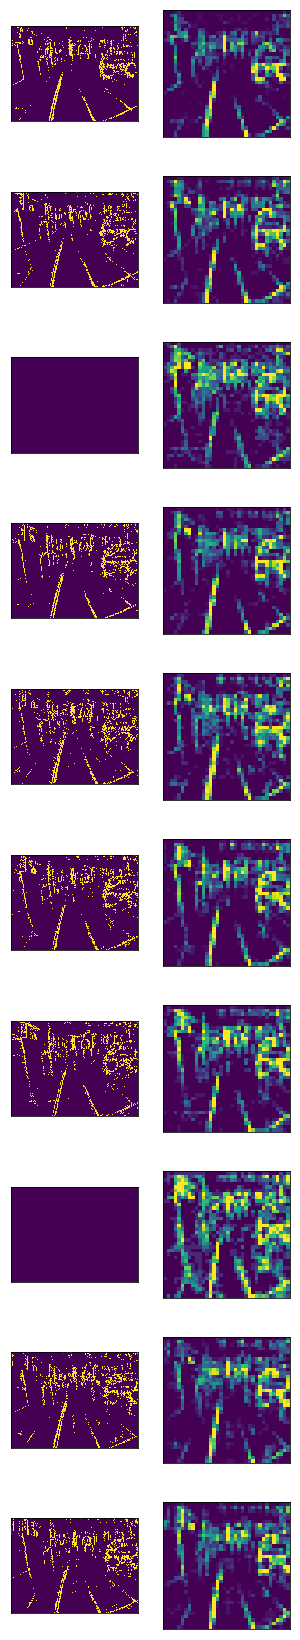

In [36]:
idxs = np.arange(10)
fig, ax = plt.subplots(len(idxs), 2, figsize=(5, 30))
tick_params = {'left': 'off', 'bottom': 'off',
               'labelbottom': 'off', 'labelleft': 'off'}
for i, j in enumerate(idxs):
    ax[i, 0].imshow(x_test3[j, :, :, 0].transpose())
    ax[i, 1].imshow(x_test4[j, :, :, 0].transpose())
    ax[i, 0].tick_params(**tick_params)
    ax[i, 1].tick_params(**tick_params)

[335 336 337 338 339 340 341 342 343 344]


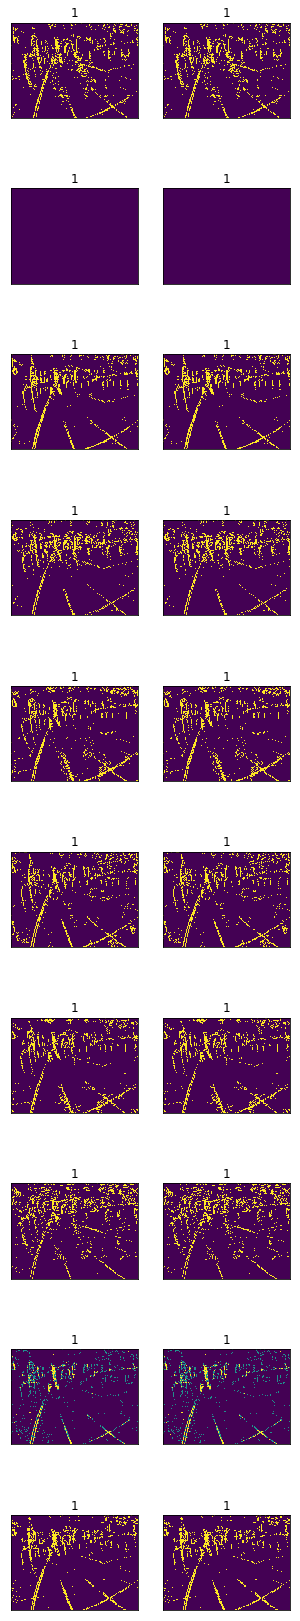

In [126]:
idxs_all = np.nonzero(np.argmax(y_test3, -1) == 1)[0]  # np.random.randint(0, len(x_test3), 10)
idxs = idxs_all[50:60]
print(idxs)
fig, ax = plt.subplots(len(idxs), 2, figsize=(5, 30))
tick_params = {'left': 'off', 'bottom': 'off',
               'labelbottom': 'off', 'labelleft': 'off'}
for i, j in enumerate(idxs):
    ax[i, 0].imshow(x_test3[j, :, :, 0].transpose())
    ax[i, 1].imshow(x_test3[j, :, :, 0].transpose())
    ax[i, 0].set_title(np.argmax(y_test3[j]))
    ax[i, 1].set_title(np.argmax(y_test3[j-1]))
    ax[i, 0].tick_params(**tick_params)
    ax[i, 1].tick_params(**tick_params)

In [45]:
idx = 203
y_max = image_shape[1]

xy = []
for x, y in zip(x_b_xaddr[idx], x_b_yaddr[idx]):
    xy.append(x*y_max + y)

xy2 = []
for x, y in zip(x_b_xaddr2[idx], x_b_yaddr2[idx]):
    xy2.append(x*y_max + y)

diff = len(xy2) - len(xy)
print('Number of events discarded during subsampling: {} ({:.2%})'.format(diff, diff/len(xy2)))

min2 = min(x_b_ts2[idx])

plt.figure(figsize=(10, 6))
plt.xlabel('Simulation time')
plt.title('Spiketrains of input layer (DVS)')
plt.ylabel('Neuron index')
plt.scatter(np.array(x_b_ts2[idx])-min2, xy2, s=50, linewidths=0, color='b')
plt.scatter(np.array(x_b_ts[idx])-min(x_b_ts[idx]), xy, s=5, linewidths=0, color='r')
# plt.xlim(0, 100)
# plt.xlim(4000, 4300)

IndexError: list index out of range

(0, 100)

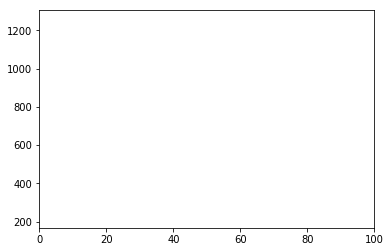

In [200]:
a = [(tt, xx) for tt, xx in zip(x_b_ts[idx], xy)]
b = [(tt, xx) for tt, xx in zip(x_b_ts2[idx], xy2)]
c = np.array([(tt2-min2, xx2) for tt2, xx2, in zip(x_b_ts2[idx], xy2) if (tt2, xx2) not in a])
plt.scatter(c[:, 0], c[:, 1], s=5, linewidths=0, color='r')
plt.xlim(0, 100)
#plt.xlim(4146, 4148)

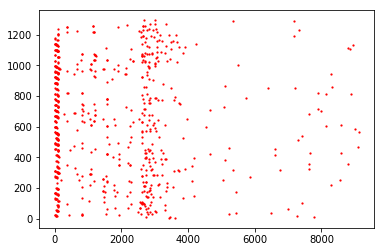

In [211]:
aa = [(tt, xx) for tt, xx in zip(x_b_ts[idx], xy)]
bb = list(set(xy))
cc =[x_b_ts[idx][xy.index(bbb)]-min2 for bbb in bb]
plt.scatter(cc, bb, s=5, linewidths=0, color='r')

In [191]:
c[np.nonzero(c[:, 0] == 4353)]

array([[4353,  960],
       [4353,  960],
       [4353,  960],
       [4353,  960],
       [4353,  816],
       [4353,  816]])

In [202]:
print(len(xy2))
print(len(a))
print(len(b))
print(len(c))

4702
4257
4702
15


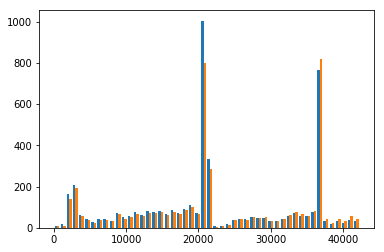

In [50]:
plt.hist([x_b_ts2[idx]-min(x_b_ts2[idx]), x_b_ts[idx]-min(x_b_ts[idx])], 50);

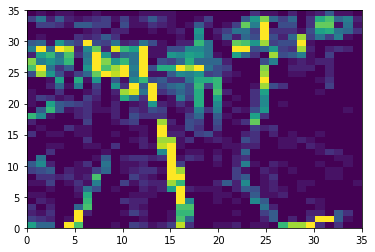

In [51]:
plt.hist2d(x_b_xaddr[idx], x_b_yaddr[idx], 36);

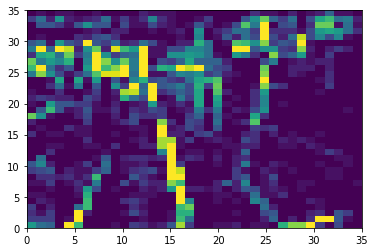

In [52]:
plt.hist2d(x_b_xaddr2[idx], x_b_yaddr2[idx], 36);

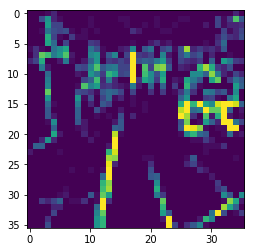

In [122]:
plt.imshow(x_test4[0, :, :, 0].transpose())

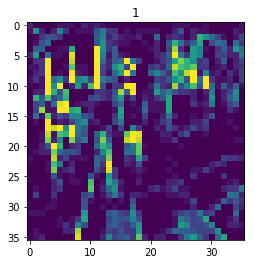

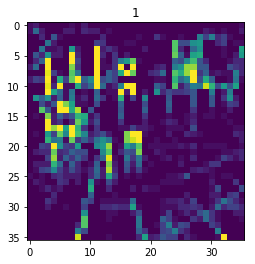

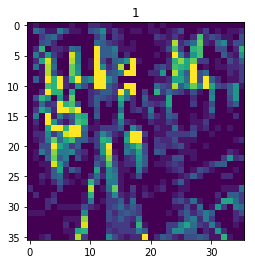

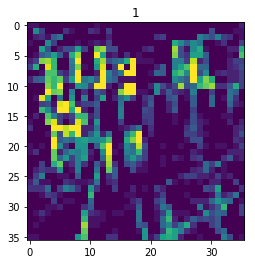

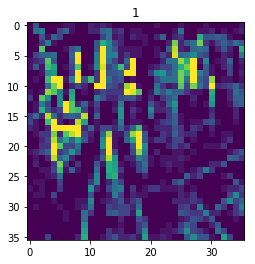

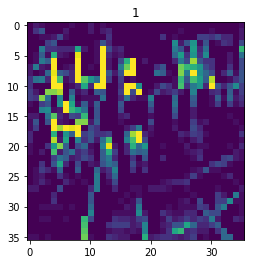

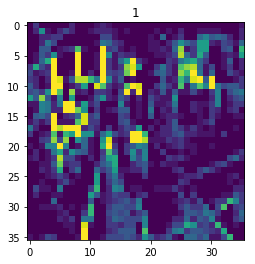

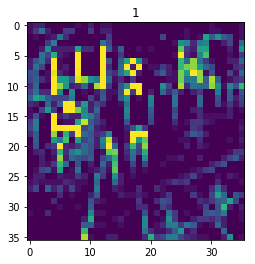

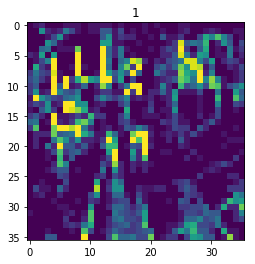

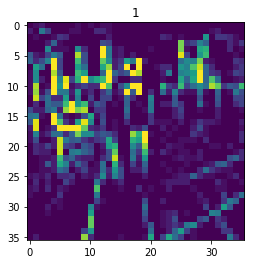

In [37]:
idxs = np.random.randint(0, len(x_test), 10)
idxs = np.arange(0, 10) - 1700
for i in idxs:
    plt.imshow(x_test[i, :, :, 0].transpose())
    plt.title(np.argmax(y_test[i]))
    plt.show()

In [16]:
len(x_test)

147571

In [17]:
len(x_test2)

972

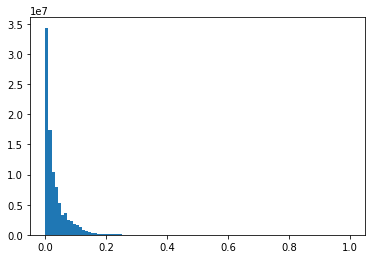

In [22]:
plt.hist(x_test[x_test.nonzero()], 100);

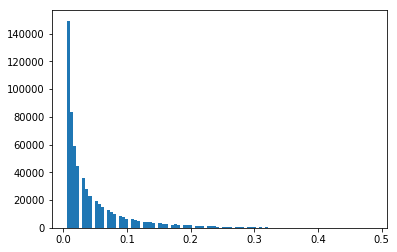

In [18]:
a = x_test[:min(len(x_test), len(x_test2)), :, :, 0].flatten()
b = a[a.nonzero()]
plt.hist(b, 100);

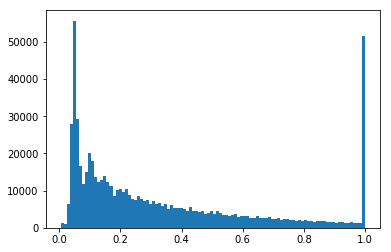

In [19]:
a = x_test2[:min(len(x_test), len(x_test2)), :, :, 0].flatten()
b = a[a.nonzero()]
plt.hist(b, 100);

In [20]:
print(x_test2[0, :, :, 0])

[[ 0.13808475  0.10356356  0.37973306 ...,  0.          0.          0.        ]
 [ 0.06904238  0.03452119  0.03452119 ...,  0.17260593  0.3106907
   0.3106907 ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.20712712  0.72494495  0.6213814  ...,  0.5178178   0.89755088
   0.06904238]
 [ 0.24164832  0.27616951  0.48329663 ...,  0.44877544  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [7]:
print(len(event_deques_list[0]))
print(len(event_deques_list2[0]))

4435
4704


First: 479982777
t: 479982777
t: 479982787
t: 479983356
First: 479983356
t: 479983356
t: 479983422
First: 479983432
t: 479983432
t: 479983442
t: 479983499
First: 479983621
t: 479983621
t: 479983798
First: 479983831
t: 479983831
t: 479983913
First: 479983976
t: 479983976
t: 479984035
First: 479984141
t: 479984141
t: 479984151
t: 479984161
First: 479984161
t: 479984161
t: 479984178
First: 479984270
t: 479984270
t: 479984319
First: 479984329
t: 479984329
t: 479984372
First: 479984398
t: 479984398
t: 479984431
First: 479984488
t: 479984488
t: 479984488
t: 479984488
t: 479984488
t: 479984521
First: 479984525
t: 479984525
t: 479984532
t: 479984742
First: 479984746
t: 479984746
t: 479984749
t: 479984789
First: 479984802
t: 479984802
t: 479984823
First: 479984823
t: 479984823
t: 479984823
t: 479984846
First: 479984880
t: 479984880
t: 479984976
First: 479984976
t: 479984976
t: 479985003
First: 479985003
t: 479985003
t: 479985020
First: 479985020
t: 479985020
t: 479985020
t: 479985067
First: 479

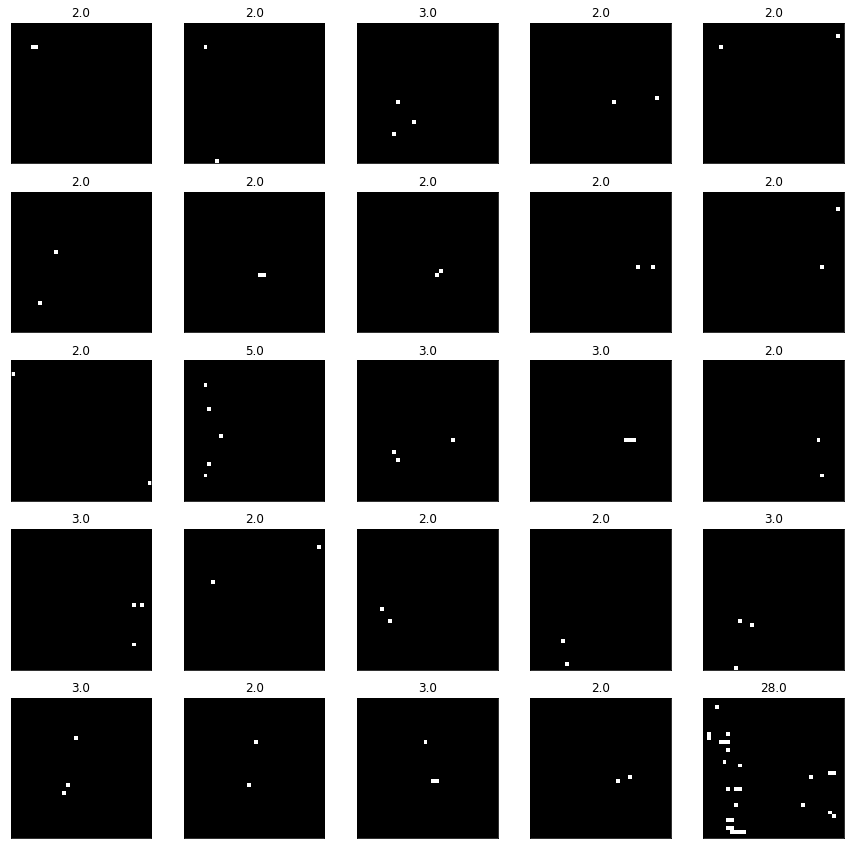

In [9]:
batch_shape = [1] + list(image_shape) + [1]
nrows = 5
ncols = 5
fig = plt.figure(figsize=(15, 15))
axes = [fig.add_subplot(nrows, ncols, 1 + r * ncols + c) for r in range(nrows) for c in range(ncols)]

for i, ax in enumerate(axes):
    input_l = next_eventframe_batch(event_deques_list, is_x_first, is_x_flipped,
                                    is_y_flipped, batch_shape, data_format, 10)[0]
    ax.imshow(input_l[:, :, 0], cmap='gray')
    ax.set_title(format(np.sum(input_l)))
    ax.set_xticks([])
    ax.set_yticks([])

First: 479982777
t: 479982777
t: 479982787
t: 479983356
First: 479983356
t: 479983356
t: 479983422
First: 479983432
t: 479983432
t: 479983442
t: 479983499
First: 479983621
t: 479983621
t: 479983798
First: 479983831
t: 479983831
t: 479983913
First: 479983976
t: 479983976
t: 479984035
First: 479984141
t: 479984141
t: 479984151
t: 479984161
First: 479984161
t: 479984161
t: 479984178
First: 479984270
t: 479984270
t: 479984319
First: 479984329
t: 479984329
t: 479984372
First: 479984398
t: 479984398
t: 479984431
First: 479984431
t: 479984431
t: 479984488
First: 479984488
t: 479984488
t: 479984488
t: 479984488
t: 479984521
First: 479984525
t: 479984525
t: 479984532
t: 479984742
First: 479984746
t: 479984746
t: 479984749
t: 479984789
First: 479984802
t: 479984802
t: 479984823
First: 479984823
t: 479984823
t: 479984823
t: 479984846
First: 479984880
t: 479984880
t: 479984976
First: 479984976
t: 479984976
t: 479985003
First: 479985003
t: 479985003
t: 479985020
First: 479985020
t: 479985020
t: 479

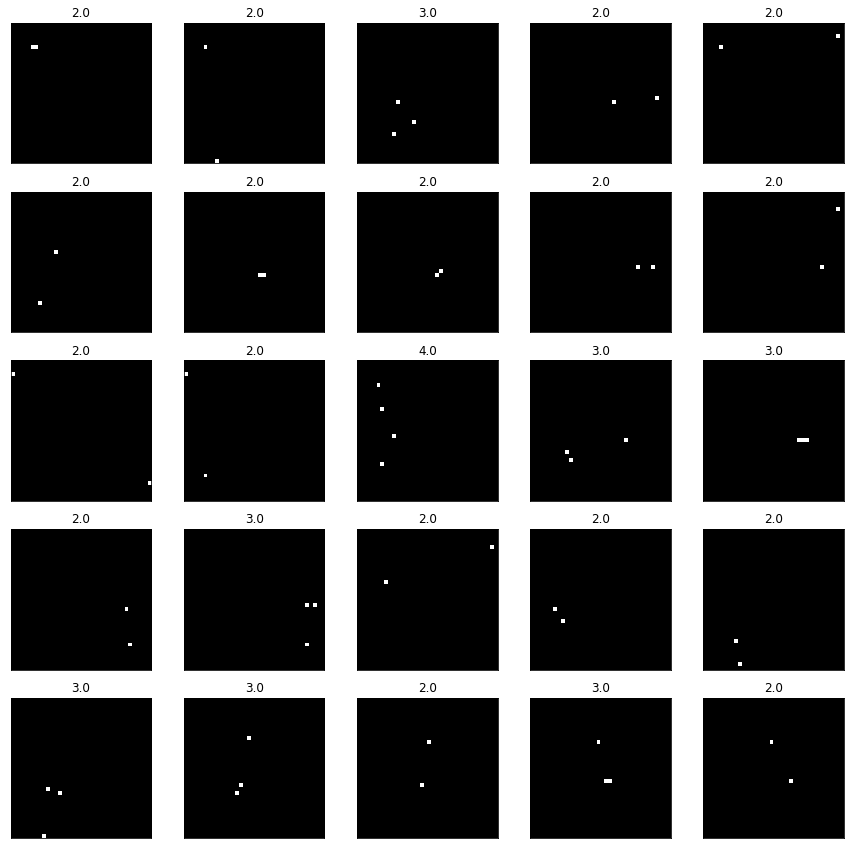

In [10]:
batch_shape = [1] + list(image_shape) + [1]
nrows = 5
ncols = 5
fig = plt.figure(figsize=(15, 15))
axes = [fig.add_subplot(nrows, ncols, 1 + r * ncols + c) for r in range(nrows) for c in range(ncols)]

for i, ax in enumerate(axes):
    input_l = next_eventframe_batch(event_deques_list2, is_x_first,
                                    is_x_flipped, is_y_flipped, batch_shape, 
                                    data_format, 10)[0]
    ax.imshow(input_l[:, :, 0], cmap='gray')
    ax.set_title(format(np.sum(input_l)))
    ax.set_xticks([])
    ax.set_yticks([])